<div class="alert alert-danger">
    <h4 style="font-weight: bold; font-size: 28px;">Exploratory Data Analysis</h4>
    <p style="font-size: 20px;">Basketball Reference Data (2000-2024)</p>
</div>

<a name="EDA"></a>

# Table of Contents

[Setup](#Setup)

**[1. Season Schedule](#1.-Season-Schedule)**

- [1.1. Descriptives](#1.1.-Descriptives)
  
**[2. Team Box Scores](#2.-Team-Box-Scores)**

- [2.1. Descriptives](#2.1.-Descriptives)

- [2.2. Univariate EDA](#2.2.-Univariate-EDA)

- [2.3. Multivariate EDA](#2.3.-Multivariate-EDA)

**[3. Player Box Scores](#3.-Player-Box-Scores)**

- [3.1. Descriptives](#3.1.-Descriptives)

- [3.2. Univariate EDA](#3.2.-Univariate-EDA)

- [3.3. Multivariate EDA](#3.3.-Multivariate-EDA)

**[4. Create Matchups and Targets](#4.-Create-Matchups-and-Targets)**

- [4.1. Merge Matchups with Team Features](#4.1.-Merge-Matchups-with-Team-Features)

- [4.2. Target: Game Winner](#4.2.-Target:-Game-Winner)

- [4.3. Target: Total Points (over / under)](#4.3.-Target:-Total-Points-(over-/-under))

- [4.4. Target: Difference in Points (to estimate spread)](#4.4.-Target:-Difference-in-Points-(to-estimate-spread))

# Setup

[Return to top](#EDA)

In [1]:
# basic modules
import os
import time
import random as rn
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# plotting style
plt.style.use('seaborn-v0_8-notebook')
sns.set_style('white')
#sns.set_style('darkgrid')

# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

# warnings
import warnings
warnings.filterwarnings("ignore")

# user defined functions
import utility_functions as utl

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


<a name="1.-Season-Schedule"></a>
# 1. Season Schedule

[Return to top](#EDA)

In [47]:
schedule_df = pd.read_csv('../data/original/br_season_schedule_2000_2024.csv')

<a name="1.1.-Descriptives"></a>
## 1.1 Descriptives

[Return to top](#EDA)

In [3]:
schedule_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30752 entries, 0 to 30751
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   season           30752 non-null  int64 
 1   date             30752 non-null  object
 2   start_time       30752 non-null  object
 3   home_team        30752 non-null  object
 4   away_team        30752 non-null  object
 5   home_team_score  30752 non-null  int64 
 6   away_team_score  30752 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 1.6+ MB


In [4]:
schedule_df.head()

,season,date,start_time,home_team,away_team,home_team_score,away_team_score
0,2000,1999-11-02,1999-11-02 05:00:00+00:00,Charlotte Hornets,Orlando Magic,100,86
1,2000,1999-11-02,1999-11-02 05:00:00+00:00,Dallas Mavericks,Golden State Warriors,108,96
2,2000,1999-11-02,1999-11-02 05:00:00+00:00,Denver Nuggets,Phoenix Suns,107,102
3,2000,1999-11-02,1999-11-02 05:00:00+00:00,Houston Rockets,Milwaukee Bucks,93,98
4,2000,1999-11-02,1999-11-02 05:00:00+00:00,Los Angeles Clippers,Seattle Supersonics,92,104


In [5]:
schedule_df.describe()

,season,home_team_score,away_team_score
count,30752.000,30752.000,30752.000
mean,2011.483,102.942,99.994
std,6.902,13.403,13.520
min,2000.000,56.000,53.000
25%,2006.000,94.000,91.000
50%,2011.000,103.000,99.000
75%,2017.000,112.000,109.000
max,2023.000,175.000,176.000


<a name="2.-Team-Box-Scores"></a>
# 2. Team Box Scores

[Return to top](#EDA)

In [48]:
team_bs_df = pd.read_csv('../data/original/br_team_box_scores_2000_2024.csv')

<a name="2.1.-Descriptives"></a>
## 2.1 Descriptives

[Return to top](#EDA)

In [7]:
team_bs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62466 entries, 0 to 62465
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   date                               62466 non-null  object
 1   team                               62466 non-null  object
 2   outcome                            62466 non-null  object
 3   minutes_played                     62466 non-null  int64 
 4   made_field_goals                   62466 non-null  int64 
 5   attempted_field_goals              62466 non-null  int64 
 6   made_three_point_field_goals       62466 non-null  int64 
 7   attempted_three_point_field_goals  62466 non-null  int64 
 8   made_free_throws                   62466 non-null  int64 
 9   attempted_free_throws              62466 non-null  int64 
 10  offensive_rebounds                 62466 non-null  int64 
 11  defensive_rebounds                 62466 non-null  int64 
 12  assi

In [8]:
team_bs_df.head()

,date,team,outcome,minutes_played,made_field_goals,attempted_field_goals,made_three_point_field_goals,attempted_three_point_field_goals,made_free_throws,attempted_free_throws,offensive_rebounds,defensive_rebounds,assists,steals,blocks,turnovers,personal_fouls,points
0,1999-11-02,Orlando Magic,Loss,240,34,80,0,8,18,27,12,36,17,9,4,22,31,86
1,1999-11-02,Charlotte Hornets,Win,240,34,82,10,22,22,37,14,33,25,13,5,21,25,100
2,1999-11-02,Golden State Warriors,Loss,240,34,82,7,18,21,27,18,33,14,4,2,23,29,96
3,1999-11-02,Dallas Mavericks,Win,240,39,85,2,15,28,34,11,30,22,11,6,13,19,108
4,1999-11-02,Phoenix Suns,Loss,265,43,111,9,22,7,14,21,37,29,9,5,13,28,102


In [9]:
team_bs_df.describe()

,minutes_played,made_field_goals,attempted_field_goals,made_three_point_field_goals,attempted_three_point_field_goals,made_free_throws,attempted_free_throws,offensive_rebounds,defensive_rebounds,assists,steals,blocks,turnovers,personal_fouls,points
count,62466.000,62466.000,62466.000,62466.000,62466.000,62466.000,62466.000,62466.000,62466.000,62466.000,62466.000,62466.000,62466.000,62466.000,62466.000
mean,241.757,37.805,83.167,7.892,22.115,18.183,23.921,11.006,31.699,22.288,7.561,4.896,13.738,21.002,101.684
std,7.438,5.485,8.003,4.224,9.632,6.205,7.646,3.982,5.491,5.253,2.911,2.573,3.886,4.500,13.633
min,240.000,16.000,51.000,0.000,1.000,1.000,1.000,0.000,12.000,3.000,0.000,0.000,1.000,5.000,53.000
25%,240.000,34.000,78.000,5.000,15.000,14.000,19.000,8.000,28.000,19.000,5.000,3.000,11.000,18.000,92.000
50%,240.000,38.000,83.000,7.000,21.000,18.000,23.000,11.000,32.000,22.000,7.000,5.000,14.000,21.000,101.000
75%,240.000,41.000,88.000,10.000,29.000,22.000,29.000,13.000,35.000,26.000,9.000,6.000,16.000,24.000,111.000
max,340.000,65.000,129.000,29.000,70.000,52.000,64.000,38.000,60.000,50.000,22.000,23.000,32.000,43.000,176.000


In [10]:
# missing values table
utl.get_missing_values(team_bs_df)

,Missing Values,% of Total Values


<a name="2.2.-Univariate-EDA"></a>
## 2.2 Univariate EDA

[Return to top](#EDA)

In [11]:
# get numeric variables
int_vars_team_bs = team_bs_df.select_dtypes(include=['int64', 'float64']).columns
print('Number of integer variables:', len(int_vars_team_bs))

Number of integer variables: 15


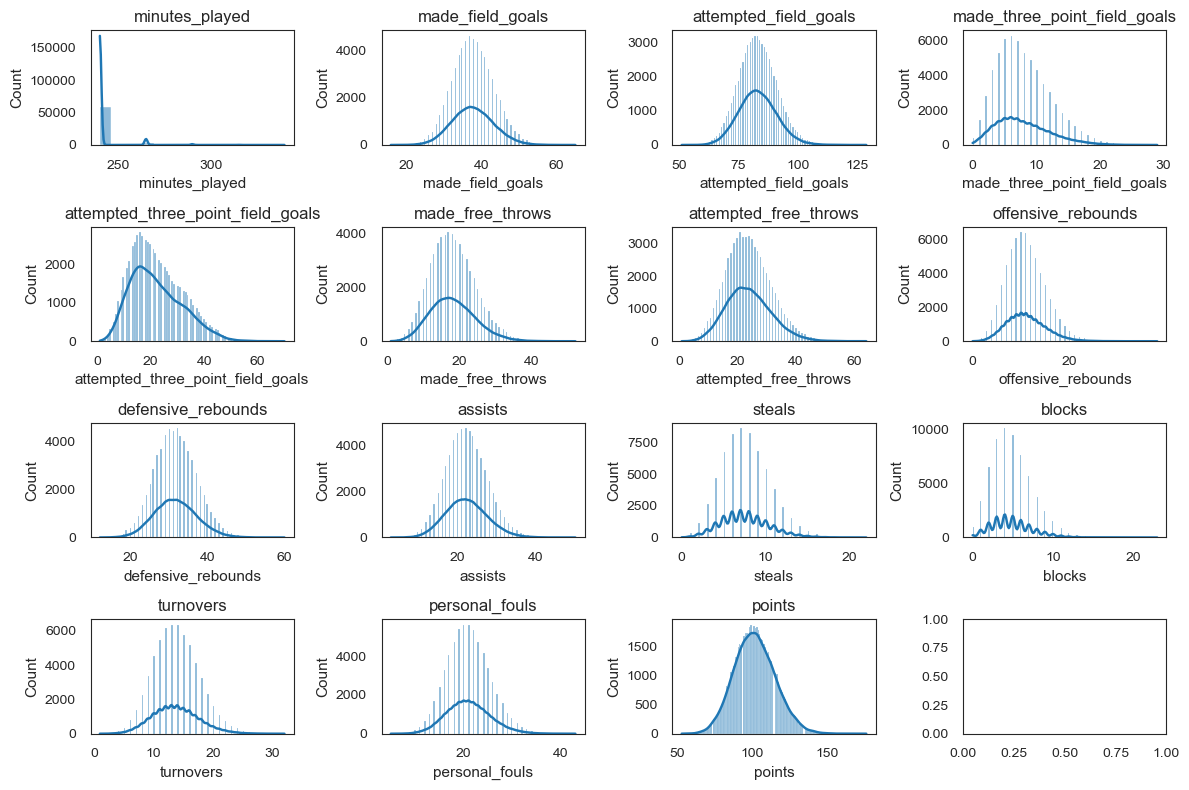

In [12]:
# histograms for each numeric column
fig, axes = plt.subplots(4, 4, figsize=(12, 8))
for ax, column in zip(axes.flatten(), int_vars_team_bs):
    sns.histplot(team_bs_df[column], kde=True, ax=ax) 
    ax.set_title(f'{column}')
plt.tight_layout();

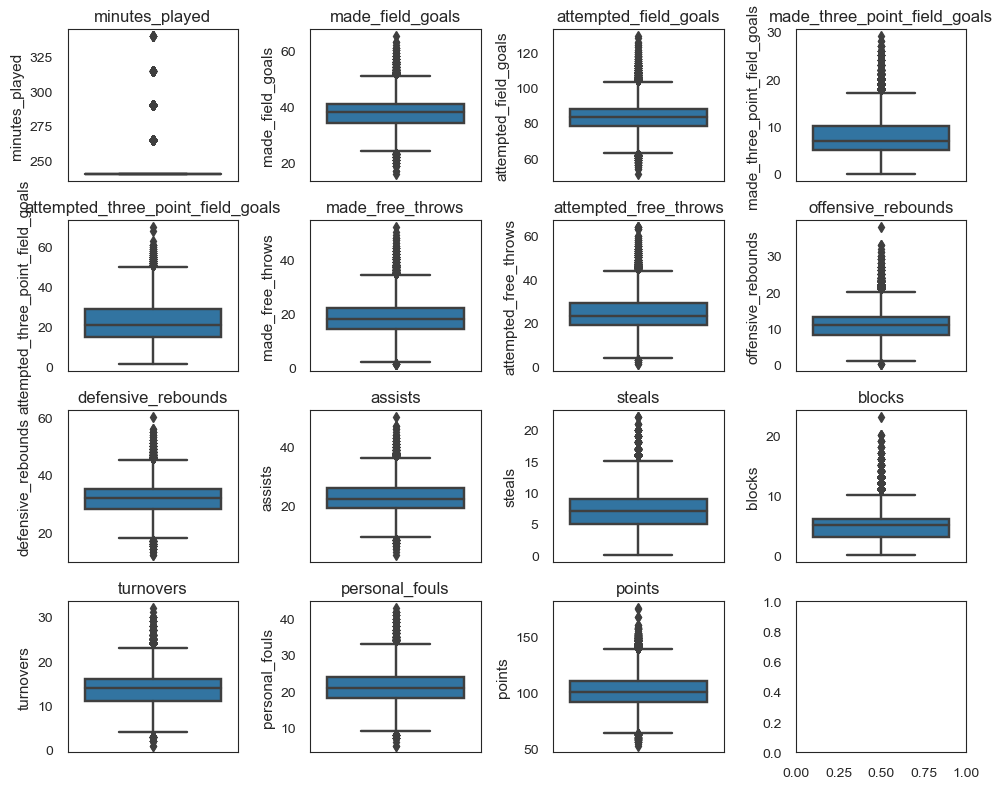

In [13]:
# boxplots for each numeric column
fig, axes = plt.subplots(4, 4, figsize=(10, 8))
for ax, column in zip(axes.flatten(), int_vars_team_bs):
    sns.boxplot(y=column, data=team_bs_df, ax=ax)
    ax.set_title(f'{column}')
plt.tight_layout();

<a name="2.3.-Multivariate-EDA"></a>
## 2.3 Multivariate EDA

[Return to top](#EDA)

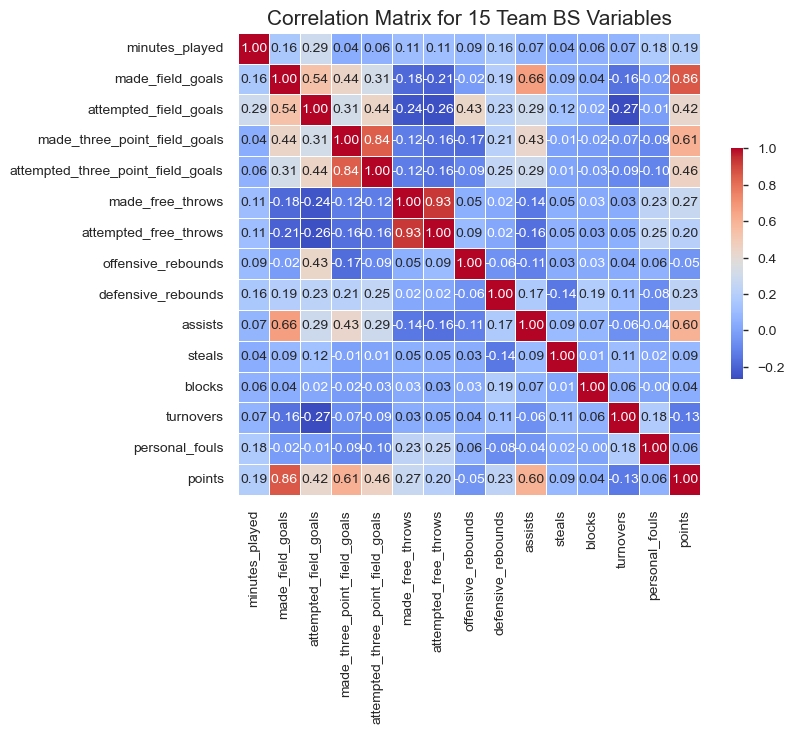

In [14]:
# correlations
plt.figure(figsize=(8, 6))
sns.heatmap(team_bs_df[int_vars_team_bs].corr(), annot=True, fmt=".2f", cmap='coolwarm', 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix for 15 Team BS Variables', fontsize=15);

<a name="3.-Player-Box-Scores"></a>
# 3. Player Box Scores

[Return to top](#EDA)

In [15]:
player_bs_df = pd.read_csv('../data/original/br_player_box_scores_2000_2024.csv')

<a name="3.1.-Descriptives"></a>
## 3.1 Descriptives

[Return to top](#EDA)

In [16]:
player_bs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645871 entries, 0 to 645870
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   date                               645871 non-null  object 
 1   slug                               645871 non-null  object 
 2   name                               645871 non-null  object 
 3   team                               645871 non-null  object 
 4   location                           645871 non-null  object 
 5   opponent                           645871 non-null  object 
 6   outcome                            645871 non-null  object 
 7   seconds_played                     645871 non-null  int64  
 8   made_field_goals                   645871 non-null  int64  
 9   attempted_field_goals              645871 non-null  int64  
 10  made_three_point_field_goals       645871 non-null  int64  
 11  attempted_three_point_field_goals  6458

In [17]:
player_bs_df.head()

,date,slug,name,team,location,opponent,outcome,seconds_played,made_field_goals,attempted_field_goals,made_three_point_field_goals,attempted_three_point_field_goals,made_free_throws,attempted_free_throws,offensive_rebounds,defensive_rebounds,assists,steals,blocks,turnovers,personal_fouls,game_score
0,1999-11-02,cassesa01,Sam Cassell,Milwaukee Bucks,Away,Houston Rockets,Win,2250,15,20,0,1,5,7,1,2,11,1,0,4,5,30.2
1,1999-11-02,vanexni01,Nick Van Exel,Denver Nuggets,Home,Phoenix Suns,Win,2733,12,21,5,7,5,7,2,7,9,0,0,3,1,29.7
2,1999-11-02,piercpa01,Paul Pierce,Boston Celtics,Away,Toronto Raptors,Win,2273,12,19,3,4,3,6,1,7,5,2,0,2,3,25.4
3,1999-11-02,odomla01,Lamar Odom,Los Angeles Clippers,Home,Seattle Supersonics,Loss,2607,10,18,2,5,8,15,2,10,3,2,2,3,1,25.1
4,1999-11-02,hillgr01,Grant Hill,Detroit Pistons,Away,Miami Heat,Loss,3134,16,35,1,3,8,11,3,6,5,0,1,4,5,23.8


In [18]:
player_bs_df.describe()

,seconds_played,made_field_goals,attempted_field_goals,made_three_point_field_goals,attempted_three_point_field_goals,made_free_throws,attempted_free_throws,offensive_rebounds,defensive_rebounds,assists,steals,blocks,turnovers,personal_fouls,game_score
count,645871.000,645871.000,645871.000,645871.000,645871.000,645871.000,645871.000,645871.000,645871.000,645871.000,645871.000,645871.000,645871.000,645871.000,645871.000
mean,1402.908,3.656,8.044,0.763,2.139,1.759,2.314,1.064,3.066,2.156,0.731,0.474,1.329,2.031,7.540
std,687.584,3.094,5.825,1.225,2.574,2.386,2.928,1.427,2.716,2.521,0.984,0.885,1.411,1.514,7.293
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-11.700
25%,890.000,1.000,3.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.800
50%,1438.000,3.000,7.000,0.000,1.000,1.000,2.000,1.000,2.000,1.000,0.000,0.000,1.000,2.000,6.100
75%,1953.000,5.000,12.000,1.000,4.000,3.000,4.000,2.000,4.000,3.000,1.000,1.000,2.000,3.000,11.800
max,3898.000,28.000,50.000,14.000,24.000,26.000,39.000,18.000,25.000,25.000,10.000,12.000,14.000,7.000,63.500


In [19]:
# missing values table
utl.get_missing_values(player_bs_df)

,Missing Values,% of Total Values


<a name="3.2.-Univariate-EDA"></a>
## 3.2 Univariate EDA

[Return to top](#EDA)

In [20]:
# get numeric variables
int_vars_player_bs = player_bs_df.select_dtypes(include=['int64', 'float64']).columns
print('Number of integer variables:', len(int_vars_player_bs))

Number of integer variables: 15


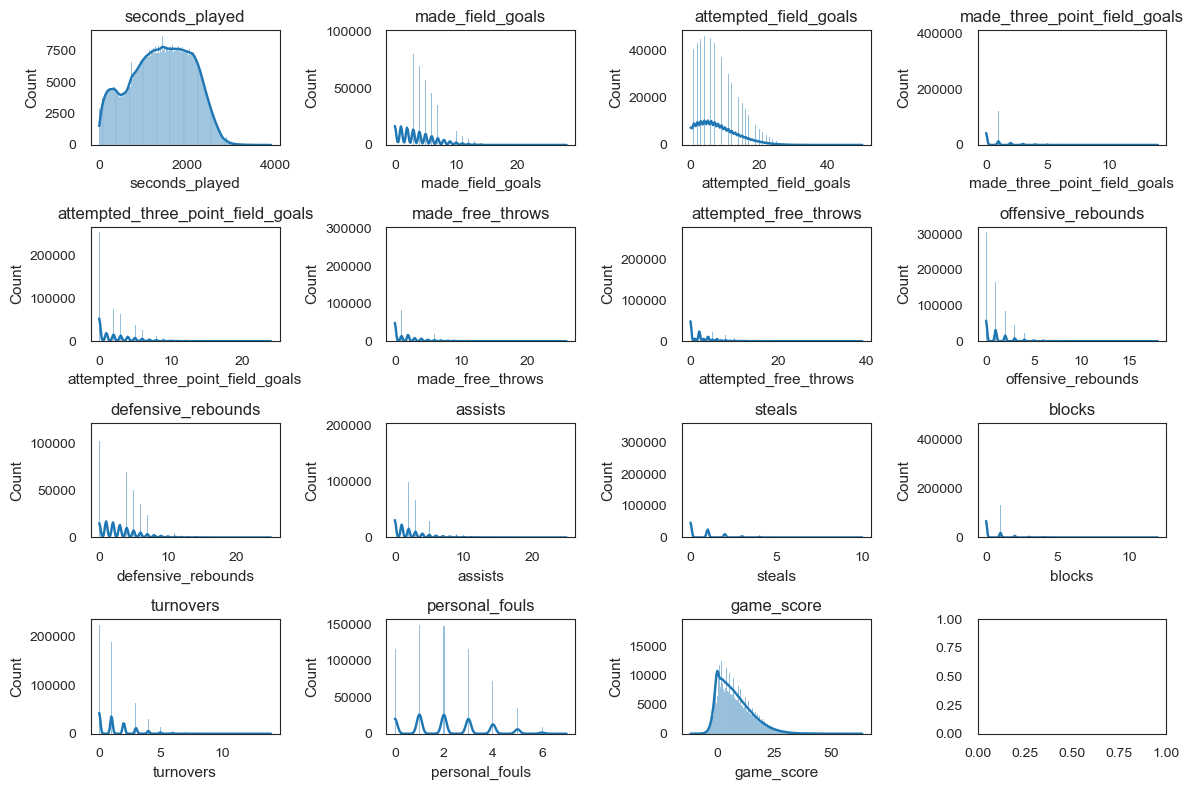

In [21]:
# histograms for each numeric column
fig, axes = plt.subplots(4, 4, figsize=(12, 8))
for ax, column in zip(axes.flatten(), int_vars_player_bs):
    sns.histplot(player_bs_df[column], kde=True, ax=ax) 
    ax.set_title(f'{column}')
plt.tight_layout();

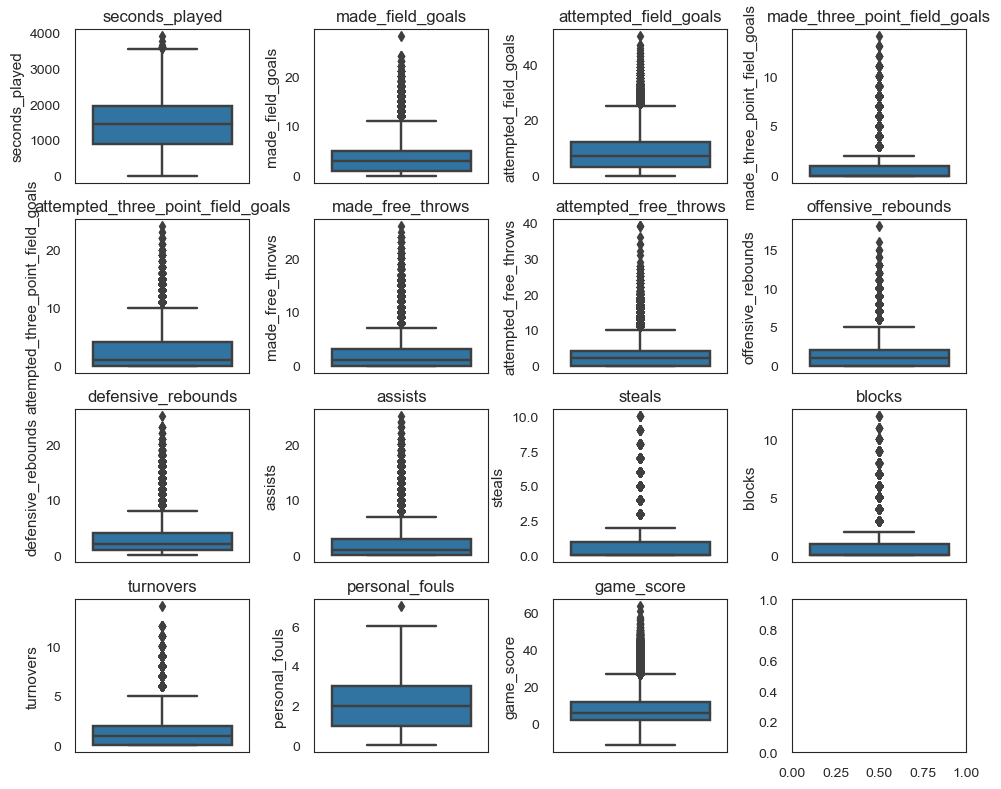

In [22]:
# boxplots for each numeric column
fig, axes = plt.subplots(4, 4, figsize=(10, 8))
for ax, column in zip(axes.flatten(), int_vars_player_bs):
    sns.boxplot(y=column, data=player_bs_df, ax=ax)
    ax.set_title(f'{column}')
plt.tight_layout();

<a name="3.3.-Multivariate-EDA"></a>
## 3.3 Multivariate EDA

[Return to top](#EDA)

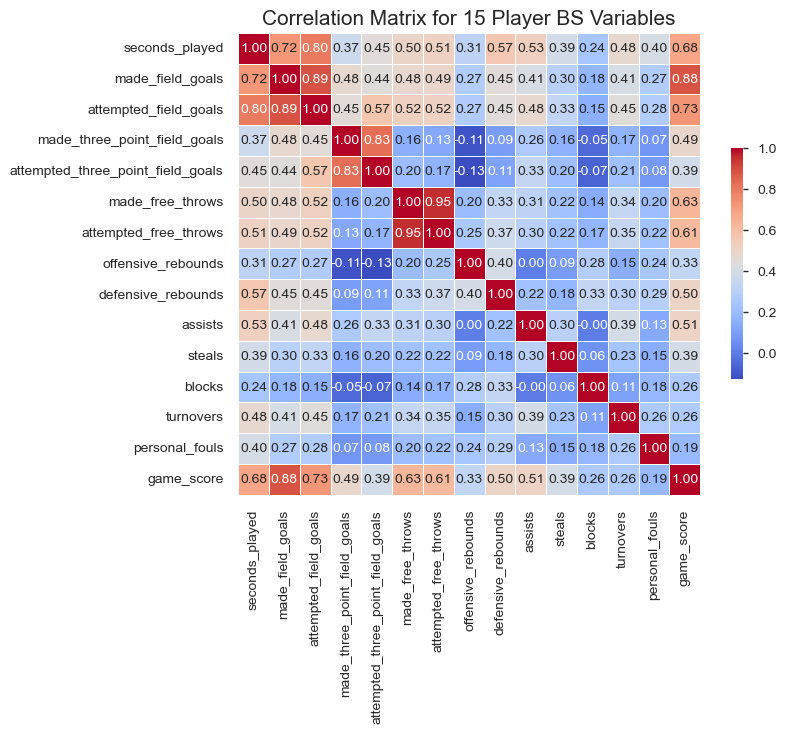

In [23]:
# correlations
plt.figure(figsize=(8, 6))
sns.heatmap(player_bs_df[int_vars_player_bs].corr(), annot=True, fmt=".2f", cmap='coolwarm', 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix for 15 Player BS Variables', fontsize=15);

<a name="4.-Create-Matchups-and-Targets"></a>
# 4. Create Matchups and Targets

[Return to top](#EDA)

<a name="4.1.-Merge-Matchups-with-Team-Features"></a>
## 4.1 Merge Matchups with Team Features

[Return to top](#EDA)

We need to merge the data frame with the matchups `schedule_df` and the data frame with the team features `team_bs_df`.

In [78]:
# step 1: merge for home teams

# a) merge team_bs_df with schedule_df on 'team' and 'date' where team_bs_df's team is the home team in schedule_df
home_team_df = pd.merge(schedule_df, team_bs_df, how='left', left_on=['date', 'home_team'], right_on=['date', 'team'])

# b) drop redundant 'teams' column
home_team_df.drop(columns='team', inplace=True)

# c) rename columns to indicate they are for the home team

# get list of columns to prefix with 'home_'
home_prefix_cols = [col for col in home_team_df.columns if col not in schedule_df.columns]

# create a renaming mapping
home_rename_dict = {col: f'home_{col}' for col in home_prefix_cols}

# rename the columns with 'home_' prefix
home_team_df.rename(columns=home_rename_dict, inplace=True)

In [79]:
home_team_df.head()

,season,date,start_time,home_team,away_team,home_team_score,away_team_score,home_outcome,home_minutes_played,home_made_field_goals,home_attempted_field_goals,home_made_three_point_field_goals,home_attempted_three_point_field_goals,home_made_free_throws,home_attempted_free_throws,home_offensive_rebounds,home_defensive_rebounds,home_assists,home_steals,home_blocks,home_turnovers,home_personal_fouls,home_points
0,2000,1999-11-02,1999-11-02 05:00:00+00:00,Charlotte Hornets,Orlando Magic,100,86,Win,240.0,34.0,82.0,10.0,22.0,22.0,37.0,14.0,33.0,25.0,13.0,5.0,21.0,25.0,100.0
1,2000,1999-11-02,1999-11-02 05:00:00+00:00,Dallas Mavericks,Golden State Warriors,108,96,Win,240.0,39.0,85.0,2.0,15.0,28.0,34.0,11.0,30.0,22.0,11.0,6.0,13.0,19.0,108.0
2,2000,1999-11-02,1999-11-02 05:00:00+00:00,Denver Nuggets,Phoenix Suns,107,102,Win,265.0,40.0,89.0,8.0,18.0,19.0,26.0,13.0,42.0,25.0,6.0,16.0,18.0,17.0,107.0
3,2000,1999-11-02,1999-11-02 05:00:00+00:00,Houston Rockets,Milwaukee Bucks,93,98,Loss,240.0,34.0,75.0,6.0,20.0,19.0,29.0,15.0,27.0,22.0,5.0,7.0,18.0,24.0,93.0
4,2000,1999-11-02,1999-11-02 05:00:00+00:00,Los Angeles Clippers,Seattle Supersonics,92,104,Loss,240.0,35.0,78.0,6.0,16.0,16.0,27.0,12.0,33.0,14.0,4.0,9.0,17.0,24.0,92.0


In [80]:
# step 2: merge for away teams

# a) merge team_bs_df with schedule_df on 'team' and 'date' where team_bs_df's team is the away team in schedule_df
away_team_df = pd.merge(schedule_df, team_bs_df, how='left', left_on=['date', 'away_team'], right_on=['date', 'team'])

# b) drop redundant 'teams' column
away_team_df.drop(columns='team', inplace=True)

# c) rename columns to indicate they are for the away team

# get list of columns to prefix with 'away_'
away_prefix_cols = [col for col in away_team_df.columns if col not in schedule_df.columns]

# create a renaming mapping
away_rename_dict = {col: f'away_{col}' for col in away_prefix_cols}

# rename the columns with 'away_' prefix
away_team_df.rename(columns=away_rename_dict, inplace=True)

In [81]:
away_team_df.head()

,season,date,start_time,home_team,away_team,home_team_score,away_team_score,away_outcome,away_minutes_played,away_made_field_goals,away_attempted_field_goals,away_made_three_point_field_goals,away_attempted_three_point_field_goals,away_made_free_throws,away_attempted_free_throws,away_offensive_rebounds,away_defensive_rebounds,away_assists,away_steals,away_blocks,away_turnovers,away_personal_fouls,away_points
0,2000,1999-11-02,1999-11-02 05:00:00+00:00,Charlotte Hornets,Orlando Magic,100,86,Loss,240.0,34.0,80.0,0.0,8.0,18.0,27.0,12.0,36.0,17.0,9.0,4.0,22.0,31.0,86.0
1,2000,1999-11-02,1999-11-02 05:00:00+00:00,Dallas Mavericks,Golden State Warriors,108,96,Loss,240.0,34.0,82.0,7.0,18.0,21.0,27.0,18.0,33.0,14.0,4.0,2.0,23.0,29.0,96.0
2,2000,1999-11-02,1999-11-02 05:00:00+00:00,Denver Nuggets,Phoenix Suns,107,102,Loss,265.0,43.0,111.0,9.0,22.0,7.0,14.0,21.0,37.0,29.0,9.0,5.0,13.0,28.0,102.0
3,2000,1999-11-02,1999-11-02 05:00:00+00:00,Houston Rockets,Milwaukee Bucks,93,98,Win,240.0,38.0,79.0,3.0,7.0,19.0,28.0,10.0,25.0,20.0,10.0,2.0,8.0,25.0,98.0
4,2000,1999-11-02,1999-11-02 05:00:00+00:00,Los Angeles Clippers,Seattle Supersonics,92,104,Win,240.0,37.0,93.0,7.0,20.0,23.0,32.0,19.0,34.0,25.0,8.0,3.0,11.0,21.0,104.0


In [84]:
# step 3: combine home and away data

# identify columns in 'away_df' that are not in 'schedule_df'
columns_to_merge = away_team_df.columns.difference(['season', 'start_time', 'home_team_score', 'away_team_score'])

# merge 'home_team_df' with these selected columns from 'away_team_df'
team_matchups_df = pd.merge(home_team_df, away_team_df[columns_to_merge], how='left', on=['date', 'home_team', 'away_team'])

In [85]:
team_matchups_df.head()

,season,date,start_time,home_team,away_team,home_team_score,away_team_score,home_outcome,home_minutes_played,home_made_field_goals,home_attempted_field_goals,home_made_three_point_field_goals,home_attempted_three_point_field_goals,home_made_free_throws,home_attempted_free_throws,home_offensive_rebounds,home_defensive_rebounds,home_assists,home_steals,home_blocks,home_turnovers,home_personal_fouls,home_points,away_assists,away_attempted_field_goals,away_attempted_free_throws,away_attempted_three_point_field_goals,away_blocks,away_defensive_rebounds,away_made_field_goals,away_made_free_throws,away_made_three_point_field_goals,away_minutes_played,away_offensive_rebounds,away_outcome,away_personal_fouls,away_points,away_steals,away_turnovers
0,2000,1999-11-02,1999-11-02 05:00:00+00:00,Charlotte Hornets,Orlando Magic,100,86,Win,240.0,34.0,82.0,10.0,22.0,22.0,37.0,14.0,33.0,25.0,13.0,5.0,21.0,25.0,100.0,17.0,80.0,27.0,8.0,4.0,36.0,34.0,18.0,0.0,240.0,12.0,Loss,31.0,86.0,9.0,22.0
1,2000,1999-11-02,1999-11-02 05:00:00+00:00,Dallas Mavericks,Golden State Warriors,108,96,Win,240.0,39.0,85.0,2.0,15.0,28.0,34.0,11.0,30.0,22.0,11.0,6.0,13.0,19.0,108.0,14.0,82.0,27.0,18.0,2.0,33.0,34.0,21.0,7.0,240.0,18.0,Loss,29.0,96.0,4.0,23.0
2,2000,1999-11-02,1999-11-02 05:00:00+00:00,Denver Nuggets,Phoenix Suns,107,102,Win,265.0,40.0,89.0,8.0,18.0,19.0,26.0,13.0,42.0,25.0,6.0,16.0,18.0,17.0,107.0,29.0,111.0,14.0,22.0,5.0,37.0,43.0,7.0,9.0,265.0,21.0,Loss,28.0,102.0,9.0,13.0
3,2000,1999-11-02,1999-11-02 05:00:00+00:00,Houston Rockets,Milwaukee Bucks,93,98,Loss,240.0,34.0,75.0,6.0,20.0,19.0,29.0,15.0,27.0,22.0,5.0,7.0,18.0,24.0,93.0,20.0,79.0,28.0,7.0,2.0,25.0,38.0,19.0,3.0,240.0,10.0,Win,25.0,98.0,10.0,8.0
4,2000,1999-11-02,1999-11-02 05:00:00+00:00,Los Angeles Clippers,Seattle Supersonics,92,104,Loss,240.0,35.0,78.0,6.0,16.0,16.0,27.0,12.0,33.0,14.0,4.0,9.0,17.0,24.0,92.0,25.0,93.0,32.0,20.0,3.0,34.0,37.0,23.0,7.0,240.0,19.0,Win,21.0,104.0,8.0,11.0


<a name="4.2.-Target:-Game-Winner"></a>
## 4.2 Target: Game Winner

[Return to top](#EDA)

This can either be `team_bs_df['outcome']`, or it can be `team_matchups_df['home_outcome']` and `team_matchups_df['away_outcome']`.

In [90]:
team_bs_df[['date', 'team', 'outcome']].head()

,date,team,outcome
0,1999-11-02,Orlando Magic,Loss
1,1999-11-02,Charlotte Hornets,Win
2,1999-11-02,Golden State Warriors,Loss
3,1999-11-02,Dallas Mavericks,Win
4,1999-11-02,Phoenix Suns,Loss


In [89]:
team_matchups_df[['date', 'home_team', 'home_outcome', 'away_team', 'away_outcome']].head()

,date,home_team,home_outcome,away_team,away_outcome
0,1999-11-02,Charlotte Hornets,Win,Orlando Magic,Loss
1,1999-11-02,Dallas Mavericks,Win,Golden State Warriors,Loss
2,1999-11-02,Denver Nuggets,Win,Phoenix Suns,Loss
3,1999-11-02,Houston Rockets,Loss,Milwaukee Bucks,Win
4,1999-11-02,Los Angeles Clippers,Loss,Seattle Supersonics,Win


<a name="4.3.-Target:-Total-Points-(over-/-under)"></a>
## 4.3 Target: Total Points (over / under)

[Return to top](#EDA)

This can be calculated as `team_matchups_df['home_team_score'] + team_matchups_df['away_team_score']`.

In [92]:
# create a new column with the total score
team_matchups_df['score_total'] = team_matchups_df['home_team_score'] + team_matchups_df['away_team_score']

In [94]:
team_matchups_df[['date', 'home_team', 'home_team_score', 'away_team', 'away_team_score', 'score_total']].head()

,date,home_team,home_team_score,away_team,away_team_score,score_total
0,1999-11-02,Charlotte Hornets,100,Orlando Magic,86,186
1,1999-11-02,Dallas Mavericks,108,Golden State Warriors,96,204
2,1999-11-02,Denver Nuggets,107,Phoenix Suns,102,209
3,1999-11-02,Houston Rockets,93,Milwaukee Bucks,98,191
4,1999-11-02,Los Angeles Clippers,92,Seattle Supersonics,104,196


<a name="4.4.-Target:-Difference-in-Points-(to-estimate-spread)"></a>
## 4.4 Target: Difference in Points (to estimate spread)

[Return to top](#EDA)

This can be calculated as `team_matchups_df['home_team_score'] - team_matchups_df['away_team_score']`.

In [95]:
# create a new column with the score difference
team_matchups_df['score_diff'] = team_matchups_df['home_team_score'] - team_matchups_df['away_team_score']

In [96]:
team_matchups_df[['date', 'home_team', 'home_team_score', 'away_team', 'away_team_score', 'score_diff']].head()

,date,home_team,home_team_score,away_team,away_team_score,score_diff
0,1999-11-02,Charlotte Hornets,100,Orlando Magic,86,14
1,1999-11-02,Dallas Mavericks,108,Golden State Warriors,96,12
2,1999-11-02,Denver Nuggets,107,Phoenix Suns,102,5
3,1999-11-02,Houston Rockets,93,Milwaukee Bucks,98,-5
4,1999-11-02,Los Angeles Clippers,92,Seattle Supersonics,104,-12


In [97]:
team_matchups_df.to_csv('../data/processed/br_team_matchups_2000_2024.csv', index=False)